In [31]:
import numpy
import h5py
import pandas

from toposample import TopoData, Config
from toposample.data import read_h5_dataset

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from figure_helper import FigureHelper

"""
Main config file. This file specifies the paths to all the result files and allows us to read the results.
"""
cfg = Config("../working_dir_mn_sz50/config/common_config.json")

fn_db_metrics = cfg._cfg['analyzed']['database']
fn_control1 = "additional_data/control_coupling_coefficients_randomized.npy"
fn_control2 = "additional_data/control_coupling_coefficients_shuffled.npy"

fhlpr = FigureHelper()
F = fhlpr("Figure 5")
S = fhlpr("Figure S5")
#topo_db = pandas.read_pickle(fn_db_metrics)

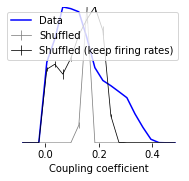

In [37]:
data_cc = topo_db["comm_coupling"]
ctrl_cc1 = numpy.load(fn_control1)
ctrl_cc2 = numpy.load(fn_control2)

cc_bins = numpy.linspace(-0.1, 0.5, 21)
plot_bins = (cc_bins[:-1] + cc_bins[1:]) / 2.0

hist_data_cc = numpy.histogram(data_cc.values, bins=cc_bins, density=True)[0]
hist_ctrl_cc1 = numpy.vstack([numpy.histogram(_cc, bins=cc_bins, density=True)[0]
                              for _cc in ctrl_cc1])
hist_ctrl_cc2 = numpy.vstack([numpy.histogram(_cc, bins=cc_bins, density=True)[0]
                              for _cc in ctrl_cc2])

hist_ctrl_mn1 = numpy.nanmean(hist_ctrl_cc1, axis=0)
hist_ctrl_sd1 = numpy.nanstd(hist_ctrl_cc1, axis=0)
hist_ctrl_mn2 = numpy.nanmean(hist_ctrl_cc2, axis=0)
hist_ctrl_sd2 = numpy.nanstd(hist_ctrl_cc2, axis=0)

def normalize_height(input_data):
    return input_data / input_data.max()

fig = plt.figure(figsize=(3.0, 2.5))
ax = fig.gca()
ax.errorbar(plot_bins, normalize_height(hist_ctrl_mn1), yerr=hist_ctrl_sd1,
            lw=0.75, color="grey", label="Shuffled")
ax.errorbar(plot_bins, normalize_height(hist_ctrl_mn2), yerr=hist_ctrl_sd2,
            lw=0.75,
            color="black", label="Shuffled (keep firing rates)")
ax.plot(plot_bins, normalize_height(hist_data_cc), color="blue", label="Data")

ax.set_xlabel("Coupling coefficient")
ax.set_yticks([])
ax.set_ylim([0, 1.0])
plt.box(False)
plt.legend()

F.save(fig, "Panel-AA")